<div class="alert alert-block alert-success">

# <center> CS587 - Assignment 5 (Part I) </center>
## <center> Tracking and Improving the Sofwtare Project Quality </center>
## <center> Defect Removal Effectiveness </center>
    

</div>

<div class="alert alert-block alert-danger">
    
### Deliverables: 
- Submit a single ZIP file for both Part 1 & Part 2 that has the folowing items:
    1. Your PDF document for the analysis report. 
    2. Your IPYNB script with the name DRE_QM.ipynb that has your source code and output for the requirements listed 
    2. Your HTML/PDF document that has your source code and output for the requirements listed 

<br>
    
</div>


<div class="alert alert-info">

     
## High Level Description:

In this assignment, you will execute 5 experiments to assess the quality of the sofwtare project using different methods utilized by the project manager to track and improve the software project quality.
    
The project manager, attempted to utlize the following methods to improve the quality of the software product delivered in  the different releases of the software product:
1. Increase the duration of the task by 10%
2. Increase the number of reviers on the review task from 4 to 5 

    
</div>




<hr style="border:5px solid orange"> </hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os



## 1 Read the data matrix from a CSV file or JSON file



In [73]:
dfs = []
for i in range(5):
    dfs.append(pd.read_csv('./csv/{}.csv'.format(i+1)))

In [12]:
cols = ['Requirement',
 'Analysis',
 'Design',
 'Coding',
 'Unittesting',
 'IntegrationTesting',
 'SystemTesting',
 'Field']

In [45]:
dfs[0]

,0,1,2,3,4,5,6,7
0,58,0,0,0,0,0,0,0
1,39,55,0,0,0,0,0,0
2,82,51,82,0,0,0,0,0
3,77,21,61,269,0,0,0,0
4,19,35,8,185,31,0,0,0
5,7,15,21,27,0,17,0,0
6,14,21,19,43,0,0,15,0
7,12,3,15,37,0,0,0,7


### 2 Create a stacked bar chart 
to plot the counts of the
defects detection phase (y-axis) for the origination phases
(X-axis)



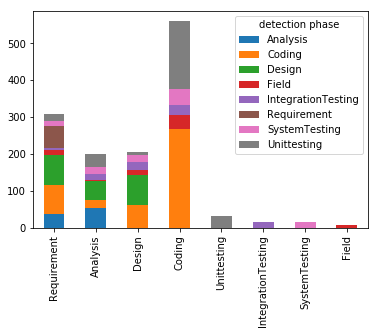

In [77]:
dfs[0]['detection phase'] = cols
dfs[0].columns = cols+['detection phase']

dfs[0].groupby('detection phase').sum().T.plot(kind='bar', stacked=True)

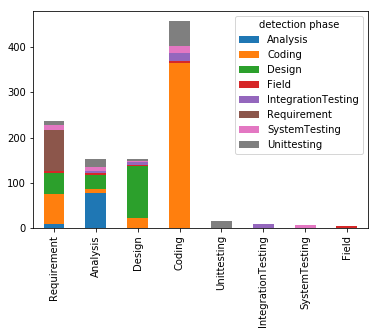

In [79]:
i = 1
dfs[i]['detection phase'] = cols
dfs[i].columns = cols+['detection phase']

dfs[i].groupby('detection phase').sum().T.plot(kind='bar', stacked=True)

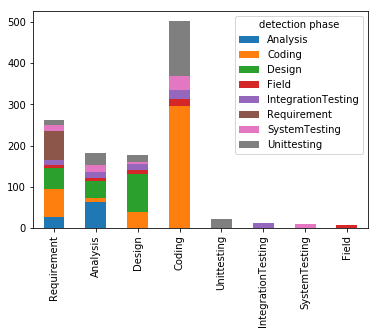

In [80]:
i = 2
dfs[i]['detection phase'] = cols
dfs[i].columns = cols+['detection phase']

dfs[i].groupby('detection phase').sum().T.plot(kind='bar', stacked=True)

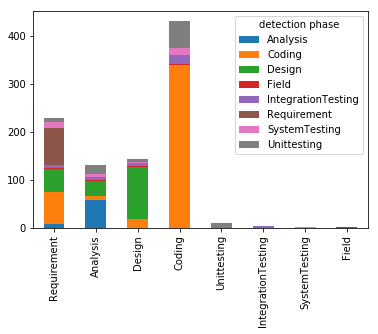

In [81]:
i = 3
dfs[i]['detection phase'] = cols
dfs[i].columns = cols+['detection phase']

dfs[i].groupby('detection phase').sum().T.plot(kind='bar', stacked=True)

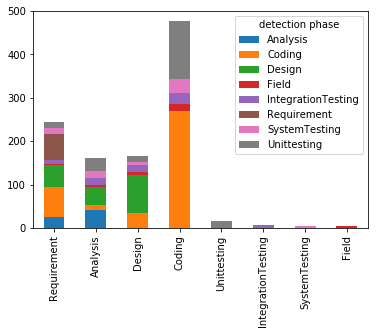

In [82]:
i = 4
dfs[i]['detection phase'] = cols
dfs[i].columns = cols+['detection phase']

dfs[i].groupby('detection phase').sum().T.plot(kind='bar', stacked=True)

## 3. Create the functions to calculate the defect removal effectiveness for every phase and the overall defect removal effectiveness

In [69]:
def geteff_phrase(df):
    effs = []
    for i in range(1,7):
        eff = df.at[i,'total'] / ( sum([df.at[8,x] for x in range(i+1)]) \
        - sum([df.at[x,'total'] for x in range(i)]) )
        eff = int(round(eff*100))
        effs.append(eff)
    return effs

In [32]:
def geteff_overall(df):
    eff_overall = 1-(df.at[7,'total']/df.at[8,'total'])
    eff_overall = round(eff_overall*100)
    return eff_overall

In [52]:
dfs = []
for i in range(5):
    dfs.append(pd.read_csv('./csv/{}.csv'.format(i+1)))

In [76]:
for i,df in enumerate(dfs):
    print('R{}'.format(i+1))
    df = df.fillna(0)
    df['total'] = df.sum(axis=1)
    df = df.append(df.sum(axis=0),ignore_index=True)
    df.columns = [0, 1, 2, 3, 4, 5, 6, 7]+['total']
    effs = geteff_phrase(df)
    eff_overall = geteff_overall(df)
    print(effs)
    print(eff_overall)
    print()

R1
[21, 38, 47, 54, 35, 63]
95.0

R2
[29, 53, 73, 57, 43, 75]
98.0

R3
[24, 40, 53, 55, 42, 65]
96.0

R4
[24, 52, 72, 55, 45, 79]
99.0

R5
[20, 41, 52, 56, 42, 70]
97.0

